In [1]:
# 페이스북이 개발한 일변량(하나의 변수) 시계열 예측을 위한 오픈소스 라이브러리
# additive time series forecasting model을 참고해서 구현됨
# 그리고 경향성(Trends), 계절성(seasonality), 휴일(holidays)을 지원하는 모델

# fbprophet설치시, 
!pip install pystan==2.18.0.0
!pip install fbprophet
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [95]:
# 버전 확인하기
import fbprophet
print(fbprophet.__version__)

0.7.1


In [96]:
# perphet기본 개념 참고 예제) https://dining-developer.tistory.com/25 
import pandas as pd
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = pd.read_csv(path, header=0)
print(df.shape)
print(df.head())

(108, 2)
     Month  Sales
0  1960-01   6550
1  1960-02   8728
2  1960-03  12026
3  1960-04  14395
4  1960-05  14587


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


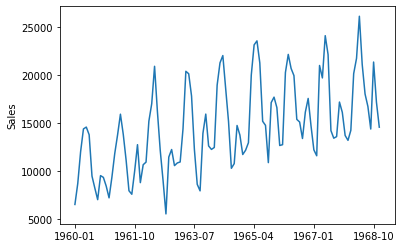

In [97]:
import matplotlib.pyplot as plt

# x축의 데이터 일부분을 뿌려봄
plt.plot(df['Month'], df['Sales'])
plt.xticks([df['Month'].iloc[n] for n in range(0, df.shape[0], int(df.shape[0]*0.2))])
plt.ylabel('Sales')
plt.show()

In [98]:
# 우선 Month가 정말 정렬되어 있는지 확인하기 
new_df = df.sort_values(by='Month')
print((new_df['Month'].values==df['Month'].values).all())

True


In [103]:
# from datetime import datetime
# df['New_Month']= df['Month'].apply(lambda x: datetime.strptime(x, '%Y-%m'))
df['New_Month'] = pd.to_datetime(df['Month'])
print(df.head())

     Month  Sales  New_Month
0  1960-01   6550 1960-01-01
1  1960-02   8728 1960-02-01
2  1960-03  12026 1960-03-01
3  1960-04  14395 1960-04-01
4  1960-05  14587 1960-05-01


In [125]:
# 모델 생성
from fbprophet import Prophet
model = Prophet()

df.rename(columns = {'Sales':'y', 'Month':'ds'}, inplace=True)
print(new_df)
print(new_df.columns)
print('y dtypes= ', new_df['y'].dtypes)
print('ds dtypes= ', new_df['ds'].dtypes)
# # # 모델 학습
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


         y         ds
0     6550 1960-01-01
1     8728 1960-02-01
2    12026 1960-03-01
3    14395 1960-04-01
4    14587 1960-05-01
..     ...        ...
103  16722 1968-08-01
104  14385 1968-09-01
105  21342 1968-10-01
106  17180 1968-11-01
107  14577 1968-12-01

[108 rows x 2 columns]
Index(['y', 'ds'], dtype='object')
y dtypes=  int64
ds dtypes=  datetime64[ns]
